In [5]:
import caffe
import sys
import argparse
# from nbfinder import NotebookFinder
# import sys
# sys.meta_path.append(NotebookFinder())
from accuracy import BBox_Accuracy
import numpy as np

In [6]:
%matplotlib inline

['L_wh_L_wh_0_split_0', 'class_scores_copy', 'data_copy', 'L_obj_L_obj_0_split_0', 'L_xy_L_xy_0_split_0', 'final_loss', 'obj_scores_copy', 'L_cls_L_cls_0_split_0', 'L_rec_L_rec_0_split_0']
(4, 768, 768)
0 [ 0.04199108  0.03754318  0.00637224]


TypeError: Invalid dimensions for image data

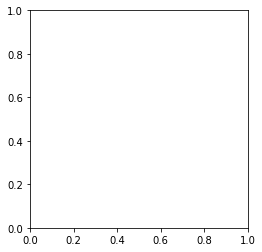

In [7]:
if __name__ == "__main__":
    def get_cl_args():
        cl_args = {"path_to_caffemodel":"/global/cscratch1/sd/imit/gbruns/climate/BEST_CLIMATE_LONG/snapshot/BEST_CLIMATE_LONG/lr_0.0001_mu_0.97_step_20000_step-fac_1.0_clip_1000000000.0_decay_0.0005_rand_1_iter_1200.caffemodel",
                    "path_to_caffe_prototxt":"/project/projectdirs/dasrepo/gordon_bell/deep_learning/networks/climate/2d_semi_sup/base_prototxt_files/deploy_vanilla.prototxt",
                   "iterations": 38, "iou_thresh": 0.1}

        if any(["jupyter" in arg for arg in sys.argv]):
            sys.argv=sys.argv[:1]

        parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
        for k,v in cl_args.iteritems():
            parser.add_argument('--' + k, type=type(v), default=v, help=k)

        args = parser.parse_args()
        cl_args.update(args.__dict__)
        return cl_args

    cl_args = get_cl_args()
    net = caffe.Net(cl_args["path_to_caffe_prototxt"],
                    cl_args["path_to_caffemodel"], 
                    caffe.TEST)
    
    
    


    keys =\
    ['xy_pred',
     'wh_pred',
     'obj_scores_copy',
     'class_scores_copy',
     ]
    bba = BBox_Accuracy(iou_thresh=cl_args["iou_thresh"])
    for ep in range(cl_args["iterations"]):
        blobs =net.forward()
        print blobs.keys()
        im = np.float32(net.blobs["data_copy"].data)[:,6]
        print im.shape
        label = np.float32(net.blobs["label"].data)
        net_out_blobs = [np.float32(net.blobs[k].data) for k in keys]


        net_output = np.concatenate(tuple(net_out_blobs),axis=1)



        bba.update_scores(net_output,label,im)
        print "Accuracy at iteration %i is %8.4f\n" % (ep,bba.compute_final_accuracy())

    print "Final Accuracy is %8.4f\n" % (bba.compute_final_accuracy())

In [ ]:

caffe.Net(cl_args["path_to_caffe_prototxt"],
          "/global/cscratch1/sd/imit/gbruns/climate/BEST_CLIMATE_LONG/snapshot/BEST_CLIMATE_LONG/lr_0.0001_mu_0.97_step_20000_step-fac_1.0_clip_1000000000.0_decay_0.0005_rand_1_iter_1200.caffemodel",
         caffe.TEST)

In [2]:
! jupyter nbconvert --to script get_accuracy.ipynb

[NbConvertApp] Converting notebook get_accuracy.ipynb to script
[NbConvertApp] Writing 2212 bytes to get_accuracy.py


In [3]:
! cp get_accuracy.py /project/projectdirs/dasrepo/gordon_bell/deep_learning/networks/climate/2d_semi_sup/

In [ ]:
#--path_to_caffemodel /global/cscratch1/sd/imit/gbruns/climate/BEST_CLIMATE_LONG/snapshot/BEST_CLIMATE_LONG/lr_0.0001_mu_0.97_step_20000_step-fac_1.0_clip_1000000000.0_decay_0.0005_rand_1_iter_1200.caffemodel --path_to_caffe_prototxt /project/projectdirs/dasrepo/gordon_bell/deep_learning/networks/climate/2d_semi_sup/base_prototxt_files/deploy_vanilla.prototxt